##### Import the loan CSV file and inspect the first 10 rows.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

loan = pd.read_csv('loan.csv')
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### Check the shape of the loan data frame

In [21]:
loan.shape

(39717, 111)

In [2]:
# Remove the months string from term column
loan['term'] = loan.term.apply(lambda x: int(x.replace('months','').replace(' ','')))
loan.term

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

In [3]:
# Remove the % text from int_rate column
loan['int_rate'] = loan.int_rate.apply(lambda x: float(x.replace('%', '')))
loan.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

###### Describe the data frame

In [4]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,13.315130,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,6.678594,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(75), int64(14), object(22)
memory usage: 33.6+ MB


In [14]:
# Lets clean up the NaN columns
loan.dropna(axis=1, inplace=True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


In [16]:
loan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
total_acc                    int64
initial_list_status 

<AxesSubplot:>

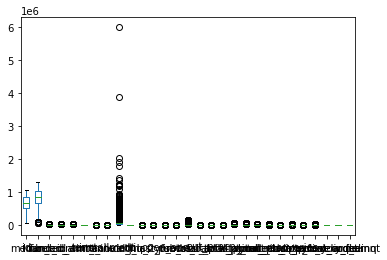

In [17]:
loan.plot.box()